In [4]:
from pathlib import Path
import xarray as xr
from metrics import MeteoFranceSnowCoverProductCompleteness, NASASnowCoverProductCompleteness
import numpy as np
import matplotlib.pyplot as plt

years = [str(y) for y in np.arange(2018, 2024)]
time_series_folder = '../output_folder/completeness_analysis/'
months = ['january']

figs, axs = plt.subplots(len(years),2,figsize=(10,30))

for i, year in enumerate(years):
    nasa_time_series_name = f'{year}_SuomiNPP_nasa_time_series_fsc.nc'
    meteofrance_time_series_name = f'{year}_meteofrance_time_series.nc'



    meteofrance_time_series_path= Path(f"{time_series_folder}").joinpath(meteofrance_time_series_name)
    nasa_time_series_path= Path(f"{time_series_folder}").joinpath(nasa_time_series_name)


    completeness_analyzer_meteofrance = MeteoFranceSnowCoverProductCompleteness(xr.open_dataset(meteofrance_time_series_path), mask_file='../data/vectorial/massifs_WGS84/massifs_WGS84/massifs_mask_eofr62.tiff')
    completeness_analyzer_nasa = NASASnowCoverProductCompleteness(xr.open_dataset(nasa_time_series_path), mask_file='../data/vectorial/massifs_WGS84/massifs_WGS84/massifs_mask_v10_epsg4326.tiff')

    year_statistics_meteofrance = completeness_analyzer_meteofrance.year_statistics(months=months,
                                                    exclude_nodata=True, 
                                                    netcdf_export_path=Path(time_series_folder).joinpath(f'{year}_meteofrance_completeness.nc'),
                                                    csv_export_path=Path(time_series_folder).joinpath(f'{year}_meteofrance_completeness.csv'),
                                                    )


    year_statistics_nasa = completeness_analyzer_nasa.year_statistics(months=months, 
                                                    exclude_nodata=True, 
                                                    netcdf_export_path=Path(time_series_folder).joinpath(f'{year}_nasa_completeness.nc'),
                                                    csv_export_path=Path(time_series_folder).joinpath(f'{year}_nasa_completeness.csv'),
                                                    )

    completeness_analyzer_meteofrance.classes_bar_distribution(year_statistics_meteofrance, classes_to_plot=['clouds', 'snow_cover', 'no_snow', 'forest_with_snow', 'forest_without_snow'], ax=axs[i,0])
    completeness_analyzer_nasa.classes_bar_distribution(year_statistics_nasa, classes_to_plot=['clouds', 'snow_cover', 'no_snow'], ax=axs[i,1])

TypeError: Too few arguments for typing.Dict; actual 1, expected 2

KeyError: "None of [Index(['January', 'February'], dtype='object', name='time')] are in the [columns]"

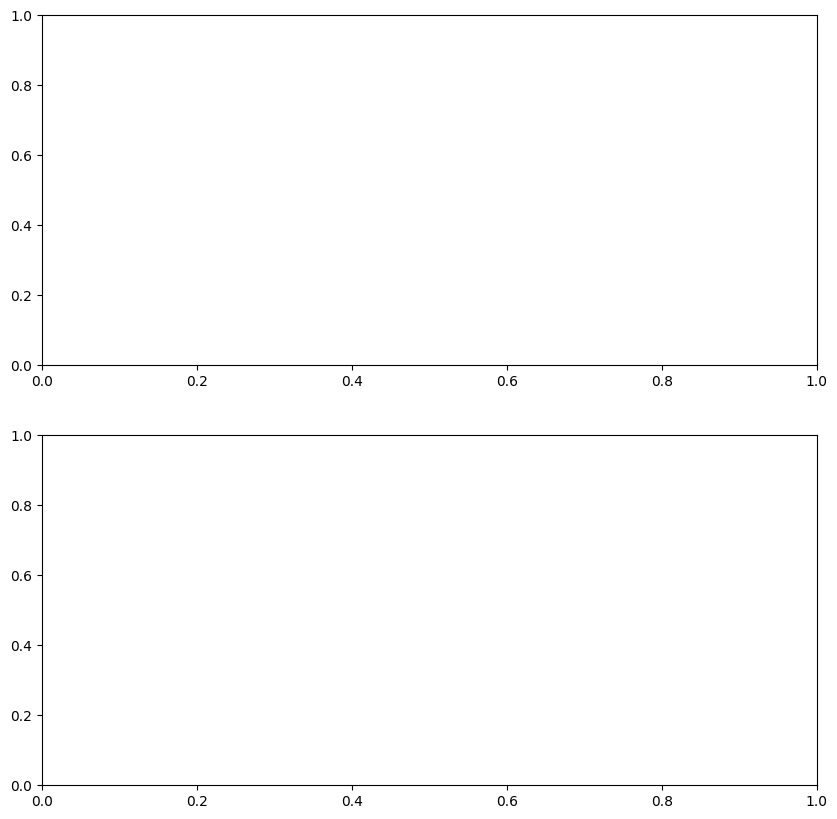

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["date.autoformatter.month"] = "%B"



#axs[0].set_x(ticks = labels=['january'])
year_statistics_nasa.to_pandas().transpose().plot.bar(title=f"Class distribution for year {year}", ax=axs[0] )

/tmp/ipykernel_34753/230987435.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2024-01-01", periods=12, freq="M")  # End of each month


<BarContainer object of 12 artists>

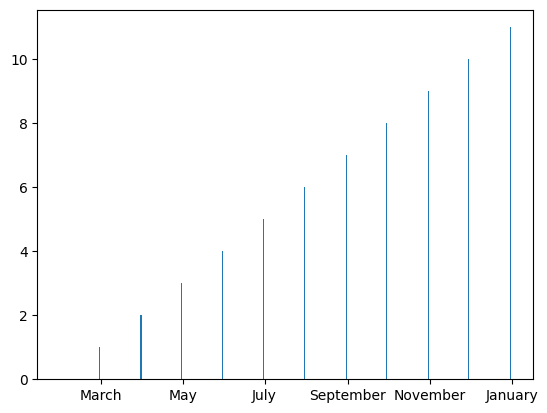

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Example data: dates and corresponding values
dates = pd.date_range(start="2024-01-01", periods=12, freq="M")  # End of each month
values = range(12)  # Some example values

# Convert dates to month names
month_names = [date.strftime("%B") for date in dates]  # '%B' gives full month names

# Create the bar plot
plt.bar(dates, values)

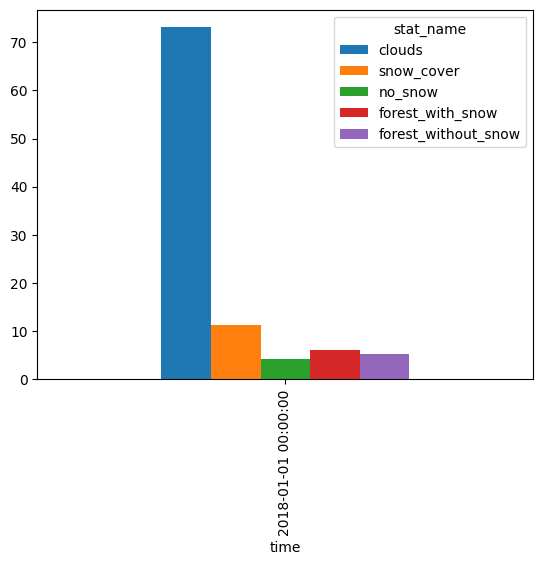

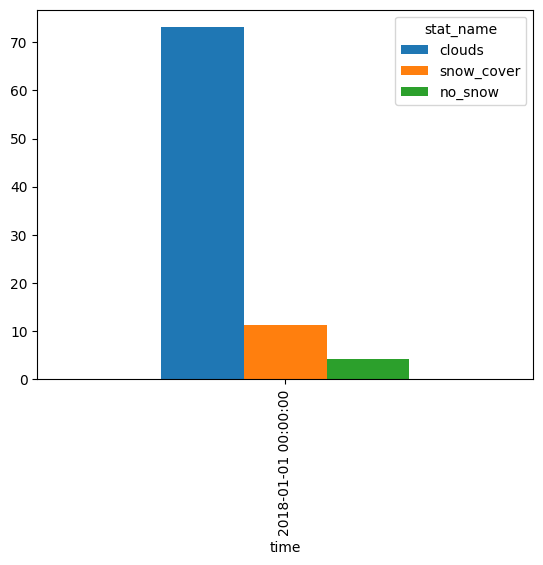

In [2]:
completeness_analyzer_meteofrance.classes_bar_distribution(year_statistics, classes_to_plot=['clouds', 'snow_cover', 'no_snow', 'forest_with_snow', 'forest_without_snow'])
completeness_analyzer_nasa.classes_bar_distribution(year_statistics, classes_to_plot=['clouds', 'snow_cover', 'no_snow'])

In [2]:
import xarray as xr
import rioxarray
import numpy as np
from pathlib import Path
import rasterio 
from tqdm import tqdm
def reproject_dataset(dataset: xr.Dataset, new_crs: str) -> xr.Dataset:
    # Rioxarray reproject nearest by default
    return (
        dataset.rio.write_crs(dataset.data_vars["spatial_ref"].attrs["spatial_ref"])
        .rio.reproject(new_crs)
        .rename({"x": 'lon', "y": 'lat'})
    )

def compute_mask_array_area(mask_array_proj_m: xr.DataArray):
    geotransform = mask_array_proj_m.rio.transform()
    pixel_x_size, pixel_y_size = geotransform[0], geotransform[4]
    area_of_a_pixel = pixel_x_size*pixel_y_size
    return mask_array_proj_m.sum(dim=('lat', 'lon'))*area_of_a_pixel

def mask_of_pixels_in_range(range: range, data_array: xr.DataArray):
    return (data_array >= range[0]) * (data_array <= range[-1])

In [3]:
years = [str(y) for y in np.arange(2018, 2024)]
time_series_folder = '../output_folder/completeness_analysis/'
months = ['january']
mask_file_mf='../data/vectorial/massifs_WGS84/massifs_WGS84/massifs_mask_eofr62.tiff'
mask_file_nasa='../data/vectorial/massifs_WGS84/massifs_WGS84/massifs_mask_v10_epsg4326.tiff'



for i, year in enumerate(years):
    nasa_time_series_name = f'{year}_SuomiNPP_nasa_time_series_fsc.nc'
    meteofrance_time_series_name = f'{year}_meteofrance_time_series.nc'

    meteofrance_time_series_path= Path(f"{time_series_folder}").joinpath(meteofrance_time_series_name)
    nasa_time_series_path= Path(f"{time_series_folder}").joinpath(nasa_time_series_name)
    
roi_mask_mf = xr.DataArray(data=rasterio.open(mask_file_mf).read(1), coords = xr.open_dataset(meteofrance_time_series_path)[['lat', 'lon']].coords)
roi_mask_nasa = xr.DataArray(data=rasterio.open(mask_file_nasa).read(1), coords = xr.open_dataset(nasa_time_series_path)[['lat', 'lon']].coords)

In [22]:
not cloud_mask_nasa

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
cloud_mask_nasa.interp_like()

In [30]:
cloud_mask_nasa

<xarray.DataArray 'snow_cover' (time: 1, lat: 2306, lon: 3295)> Size: 8MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 8B 2023-01-01
  * lat      (lat) float64 18kB 51.49 51.49 51.48 51.48 ... 41.01 41.0 41.0
  * lon      (lon) float64 26kB -4.999 -4.994 -4.99 -4.985 ... 9.99 9.995 10.0

In [5]:
meteofr.isel(time=1)

<xarray.Dataset> Size: 25MB
Dimensions:      (lat: 4200, lon: 6002)
Coordinates:
    time         datetime64[ns] 8B 2023-01-01T13:44:04.000000032
  * lat          (lat) float64 34kB 51.5 51.49 51.49 51.49 ... 41.0 41.0 41.0
  * lon          (lon) float64 48kB -5.001 -4.999 -4.996 ... 9.996 9.999 10.0
Data variables:
    snow_cover   (lat, lon) uint8 25MB ...
    spatial_ref  int64 8B ...

In [4]:
import xesmf as xe
regridder = xe.Regridder(meteofr.isel(time=1), nasa.isel(time=1), "conservative")
regridder  # print basic regridder information.


In [4]:
meteofr = xr.open_dataset(meteofrance_time_series_path)
nasa = xr.open_dataset(nasa_time_series_path)
for day in tqdm(range(1,2)):

    daily_mf_images = meteofr.groupby('time.dayofyear')[day].where(roi_mask_mf)
    daily_nasa_image = nasa.groupby('time.dayofyear')[day].where(roi_mask_nasa)

    cloud_mask_nasa = daily_nasa_image.data_vars['snow_cover'] == 250
    cloud_mask_nasa.interp_like(daily_mf_images, method='nearest')
    print(cloud_mask_nasa)
    #daily_mf_images.data_vars['snow_cover'].where(not cloud_mask_nasa)

    # snow_covered_mask_mf = mask_of_pixels_in_range(range(1,200), daily_mf_images.where(not cloud_mask_nasa))
    # reprojected_daily_mf_images = snow_covered_mf
    # snow_covered_area_mf = compute_mask_array_area(reproject_dataset(snow_covered_mf, new_crs="epsg:32631"))
    # forest_with_snow =  daily_mf_images.where(not cloud_mask_nasa).where(daily_mf_images == 210)

    # output_ds =
    # snow_covered_area_mf = compute_mask_array_area(reproject_dataset(snow_covered_mf, new_crs="epsg:32631"))
    # forest_with_snow = compute_mask_array_area(reproject_dataset(forest_with_snow, new_crs="epsg:32631"))

    
    # cloud_masks_mf = daily_mf_images == 255
    # nodata_mask_mf = daily_mf_images == 230
    # cloud_mask_union_mf = cloud_masks_mf.any(dim='time')
    # snow_covered





    


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:02<?, ?it/s]


TypeError: interp only works for a numeric type array. Given bool.

In [ ]:
#for month in months:
for day in days:
    cloud_mask_mf = mf.all_in_day(mask)
    cloud_mask = cloud_mask_mf+cloud_mask_nasa
    final_mask = mf_nodata_mask + cloud_mask
    snow_mask_mf = meteofrance.where[cloud_mask] in range of snow
    forest_with_snow_meteofrance = meteofrance.where[cloud_mask] == forest_with_snow
    snow_mask_nasa = nasa.where[cloud_amsk] in range of snow
    nasa.sum('lat, lon')*pixel_size

    out_array = xr.dataset(dat_vars=areas per classes)

export
        


In [31]:
month_dict = {
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12,
}

<Axes: >

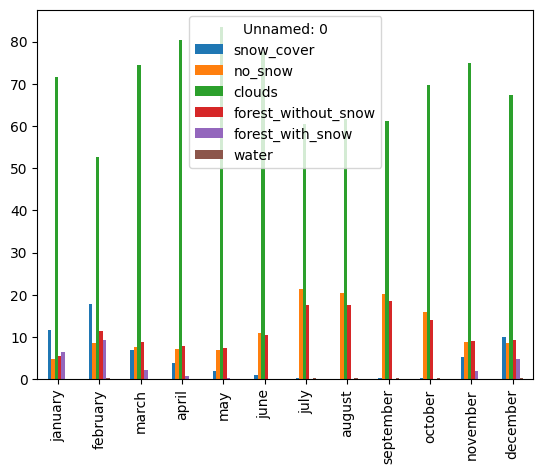

<Axes: >

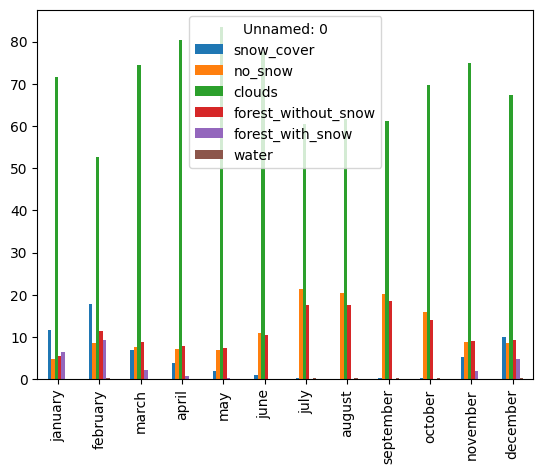

In [49]:
mf.index = mf['Unnamed: 0']
mf =mf.drop('n_images')
mf[list(month_dict.keys())].transpose().plot.bar()

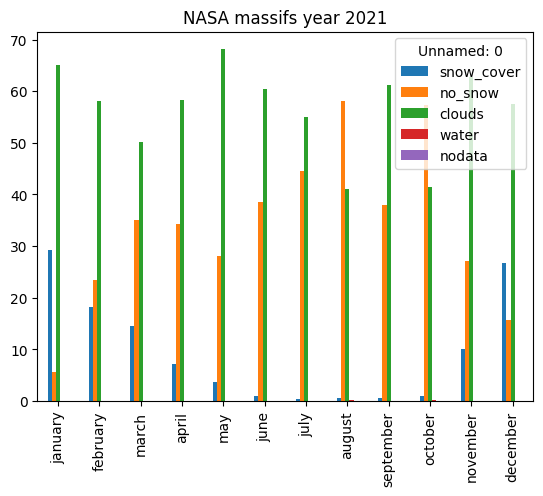

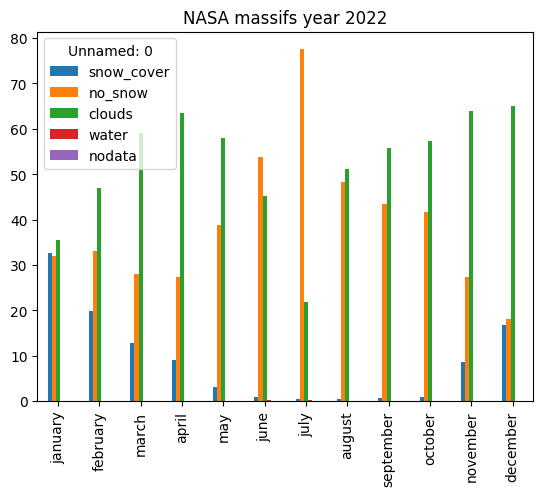

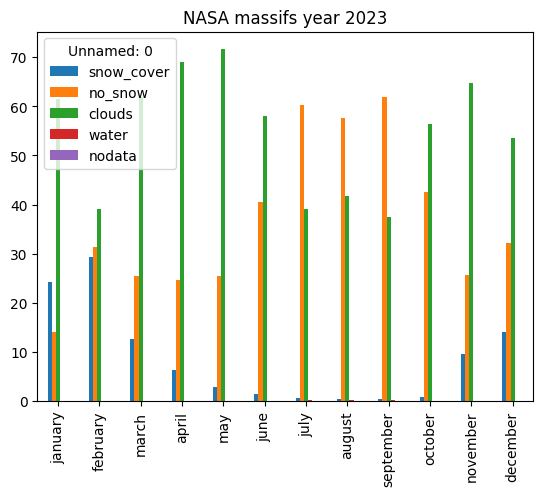

In [53]:
import pandas as pd
import xarray as xr

folder = '../output_folder/completeness_analysis/old_exports'
for year in range(2021, 2024):
    mf = pd.read_csv(f"{folder}/meteo_france_massifs_{year}.csv")
    nasa = pd.read_csv(f"{folder}/nasa_massifs_{year}.csv")

    nasa.index = nasa['Unnamed: 0']
    nasa =nasa.drop('n_images')
    nasa[list(month_dict.keys())].transpose().plot.bar(title=f'NASA massifs year {year}')
    # mf.index = mf['Unnamed: 0']
    # mf =mf.drop('n_images')
    # mf[list(month_dict.keys())].transpose().plot.bar(title=f'Météo-France massifs year {year}')
